In [1]:
import numpy as np
import random
import os
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
colors = ['r', 'g']
colors2 = [['r', 'g'], ['b', 'y']]

In [3]:
def PlotFirst(df):
    plt.grid(True)
    plt.plot(df[df['y'] == 0]['x1'], df[df['y'] == 0]['x2'], 'o', c=colors[0])
    plt.plot(df[df['y'] == 1]['x1'], df[df['y'] == 1]['x2'], 'o', c=colors[1])

In [4]:
def PlotSecond(df):
    plt.grid(True)
    plt.plot(df[(df['y1'] == 0) & (df['y2'] == 0)]['x1'], df[(df['y1'] == 0) & (df['y2'] == 0)]['x2'], 'o', c=colors2[0][0])
    plt.plot(df[(df['y1'] == 1) & (df['y2'] == 1)]['x1'], df[(df['y1'] == 1) & (df['y2'] == 1)]['x2'], 'o', c=colors2[1][1])
    plt.plot(df[(df['y1'] == 0) & (df['y2'] == 1)]['x1'], df[(df['y1'] == 0) & (df['y2'] == 1)]['x2'], 'o', c=colors2[0][1])
    plt.plot(df[(df['y1'] == 1) & (df['y2'] == 0)]['x1'], df[(df['y1'] == 1) & (df['y2'] == 0)]['x2'], 'o', c=colors2[1][0])

In [5]:
class Perceptron:
    def __init__(self, epochs=25, lr=0.1, flag=True):
        self.epochs = epochs
        self.lr = lr
        self.weights = []
        self.bias = 0
        self.errors = []
        
    def Train(self, sequences, labels, flag=True):
        random.seed(7)
        if flag:
            self.weights = np.random.sample((2, 2))
            self.bias = np.random.sample(2)
        else:
            self.bias = random.random()
            self.weights = np.random.sample(2)
            
        iteration = 0
        i = 0
        while i < sequences.shape[0]:
            if iteration == self.epochs:
                break
            predictedLabel = self.Predict(sequences[i], self.weights, self.bias, flag)
            error = labels[i] - predictedLabel
            self.errors.append(abs(error))
            if (np.linalg.norm(error) != 0):
                print('iter: {} weights: {} bias: {}\n'.format(iteration, self.weights, self.bias))
                if flag:
                    self.weights += self.lr * sequences[i].reshape(-1, 1).dot(error.reshape(1, -1))
                else:
                    self.weights += self.lr *  sequences[i] * error
                self.bias += self.lr * error
                i = -1
            i += 1
            iteration += 1
        return self.weights, self.bias
    
    def MAE(self):
        return sum(self.errors) / len(self.errors)
    
    def F(self, x, w, b):
        return np.dot(x, w) + b
         
        
    def Predict(self, seq, weights, bias, flag=True):
        if (flag):
            return np.heaviside(self.F(seq, weights, bias), 1)
        return 1 if self.F(seq, weights, bias) >= 0 else 0

In [6]:
def DividingLine(x, w0, w1, b):
    return (-w0 * x - b) / w1

### Первая обучающая выборка

In [7]:
sequences = np.array([[-3.8, -0.2, 2.9, -4.5, -4.2, 4.4], [0.4, 3.9, 2.3, -4.3, 2.9, 1.8]], dtype=np.float32)
labels = np.array([1, 1, 0, 0, 1, 0])

In [8]:
ds = np.insert(sequences, 2, labels, axis=0)
df = pd.DataFrame(ds.T, columns=['x1', 'x2', 'y'])

In [9]:
df

,x1,x2,y
0,-3.8,0.4,1.0
1,-0.2,3.9,1.0
2,2.9,2.3,0.0
3,-4.5,-4.3,0.0
4,-4.2,2.9,1.0
5,4.4,1.8,0.0


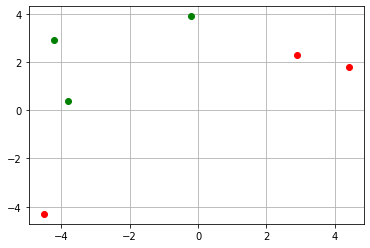

In [10]:
PlotFirst(df)

### Вторая обучающая выборка

In [11]:
sequences2 = np.array([[-0.6, -4.7, 2.1, -1.7, -1.8, 0.4, 0.5, -2.6], [4, 0.3, -3.3, -3.2, -1, -4.6, -2.3, -2.6]], dtype=np.float32)
labels2 = np.array([[1, 1, 0, 0, 0, 0, 0, 0], [1, 1, 0, 0, 1, 0, 0, 0]])

ds2 = np.insert(sequences2, 2, labels2, axis=0)
df2 = pd.DataFrame(ds2.T, columns=['x1', 'x2', 'y1', 'y2'])

In [12]:
df2

,x1,x2,y1,y2
0,-0.6,4.0,1.0,1.0
1,-4.7,0.3,1.0,1.0
2,2.1,-3.3,0.0,0.0
3,-1.7,-3.2,0.0,0.0
4,-1.8,-1.0,0.0,1.0
5,0.4,-4.6,0.0,0.0
6,0.5,-2.3,0.0,0.0
7,-2.6,-2.6,0.0,0.0


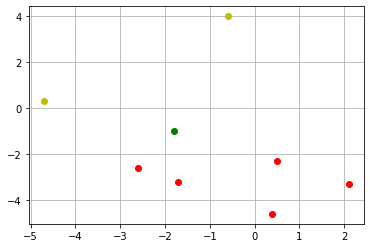

In [13]:
PlotSecond(df2)

In [14]:
epochs = 50
lr = 0.1

Случайным образом зададим точки.

In [15]:
np.random.seed(7)
randSeqs = (np.random.uniform(-5, 5, (5, 2)))
randSeqs

array([[-4.23691711e+00,  2.79918792e+00],
       [-6.15907686e-01,  2.23465178e+00],
       [ 4.77989512e+00,  3.84958704e-01],
       [ 1.12046366e-02, -4.27948867e+00],
       [-2.31561020e+00, -1.17499174e-03]])

In [16]:
np.random.seed(7)
randLabels = np.random.randint(0, 2, 5)
randLabels

array([1, 0, 1, 0, 1])

Обучим нейросеть на первой обучающей выборке

In [17]:
model = Perceptron(epochs, lr)
weights, bias = model.Train(sequences.T, labels, False)
print('weights: {}, bias: {}'.format(weights, bias))

iter: 0 weights: [0.9782229  0.45558491] bias: 0.32383276483316237

iter: 1 weights: [0.5982229  0.49558492] bias: 0.42383276483316235

iter: 2 weights: [0.21822291 0.53558492] bias: 0.5238327648331623

iter: 5 weights: [-0.16177709  0.57558492] bias: 0.6238327648331623

iter: 8 weights: [-0.45177711  0.34558492] bias: 0.5238327648331623

iter: 12 weights: [-0.74177713  0.11558491] bias: 0.42383276483316235

iter: 15 weights: [-0.29177711  0.54558495] bias: 0.32383276483316237

iter: 19 weights: [-0.58177714  0.31558495] bias: 0.22383276483316236

iter: 22 weights: [-0.13177712  0.74558498] bias: 0.12383276483316236

weights: [-0.42177714  0.51558498], bias: 0.02383276483316235


Ошибка обучения сети

In [18]:
model.MAE()

0.3103448275862069

Предскажем классы на случайно заданной выборке

In [19]:
pred = [model.Predict(line, weights, bias, False) for line in randSeqs]
pred

[1, 1, 0, 0, 1]

Отобразим первую обучающую выборку, случайно заданную выборку (треугольнички) и дискриминантную линию.

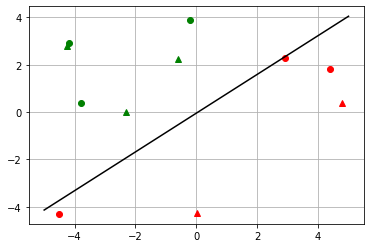

In [20]:
PlotFirst(df)
area = np.linspace(-5, 5, 10)
line = DividingLine(area, weights[0], weights[1], bias)
plt.plot(area, line, color='black')

for x, y, color in zip(randSeqs[:, 0], randSeqs[:, 1], pred):
    plt.plot(x, y, "^", c=colors[color])

Изменим первую обучающую выборку так, чтобы она стала линейно неразделимой.

In [21]:
sequences_ = np.array([[-3.8, -0.2, 2.9, -4.5, -4.2, 4.4], [0.4, 3.9, 2.3, -4.3, 2.9, 1.8]], dtype=np.float32)
labels_ = np.array([1, 1, 0, 0, 0, 0])

ds_ = np.insert(sequences_, 2, labels_, axis=0)
df_ = pd.DataFrame(ds_.T, columns=['x1', 'x2', 'y'])

In [22]:
df_

,x1,x2,y
0,-3.8,0.4,1.0
1,-0.2,3.9,1.0
2,2.9,2.3,0.0
3,-4.5,-4.3,0.0
4,-4.2,2.9,0.0
5,4.4,1.8,0.0


In [23]:
model_ = Perceptron(epochs, lr)
weights_, bias_ = model_.Train(sequences_.T, labels_, False)
print('weights: {}, bias: {}'.format(weights_, bias_))

iter: 0 weights: [0.30801277 0.26387084] bias: 0.32383276483316237

iter: 3 weights: [-0.07198723  0.30387084] bias: 0.42383276483316235

iter: 7 weights: [-0.36198725  0.07387084] bias: 0.32383276483316237

iter: 10 weights: [0.08801277 0.50387087] bias: 0.22383276483316236

iter: 13 weights: [-0.20198726  0.27387087] bias: 0.12383276483316236

iter: 17 weights: [-0.49198728  0.04387087] bias: 0.02383276483316235

iter: 20 weights: [-0.04198726  0.4738709 ] bias: -0.07616723516683765

iter: 24 weights: [-0.33198728  0.2438709 ] bias: -0.17616723516683766

iter: 25 weights: [0.11801274 0.67387094] bias: -0.27616723516683767

iter: 28 weights: [-0.26198726  0.71387094] bias: -0.17616723516683766

iter: 32 weights: [-0.55198728  0.48387093] bias: -0.27616723516683767

iter: 35 weights: [-0.10198726  0.91387097] bias: -0.3761672351668377

iter: 40 weights: [-0.39198728  0.68387097] bias: -0.4761672351668377

iter: 41 weights: [0.0280127  0.39387095] bias: -0.5761672351668377

iter: 46 wei

Ошибка обучения сети

In [24]:
model_.MAE()

0.32

Предскажем классы рандомной выборки по уже обученной сети

In [25]:
pred_ = [model.Predict(line, weights_, bias_, False) for line in randSeqs]
pred_

[1, 1, 0, 0, 1]

Отобразим измененную обучающую выборку, случайно заданную выборку (треугольнички) и дискриминантную линию.

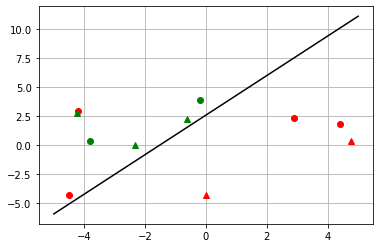

In [26]:
PlotFirst(df_)
area = np.linspace(-5, 5, 10)
line = DividingLine(area, weights_[0], weights_[1], bias_)
plt.plot(area, line, color='black')

for x, y, color in zip(randSeqs[:, 0], randSeqs[:, 1], pred_):
    plt.plot(x, y, "^", c=colors[color])

Обучаем сеть на 50 эпохах на второй обучающей выборке.
Посмотрим вычисленные веса и смещения во время обучения.

In [27]:
sequences2.T.shape

(8, 2)

In [28]:
model2 = Perceptron(epochs, lr)
weights2, bias2 = model2.Train(sequences2.T, labels2.T, True)

iter: 1 weights: [[0.08674343 0.41937221]
 [0.01591036 0.52776479]] bias: [0.86880146 0.33083925]

iter: 4 weights: [[ 0.08674343 -0.05062777]
 [ 0.01591036  0.5577648 ]] bias: [0.86880146 0.43083925]

iter: 9 weights: [[-0.12325656 -0.05062777]
 [ 0.34591036  0.5577648 ]] bias: [0.76880146 0.43083925]

iter: 14 weights: [[ 0.05674343 -0.23062777]
 [ 0.44591036  0.4577648 ]] bias: [0.66880146 0.53083925]

iter: 16 weights: [[ 0.23674343 -0.23062777]
 [ 0.54591036  0.4577648 ]] bias: [0.56880146 0.53083925]

iter: 21 weights: [[-0.23325655 -0.23062777]
 [ 0.57591036  0.4577648 ]] bias: [0.66880146 0.53083925]



Полученные итоговые веса, смещения.

In [29]:
print('weights: {}, bias: {}'.format(weights2, bias2))

weights: [[-0.05325656 -0.23062777]
 [ 0.67591036  0.4577648 ]], bias: [0.56880146 0.53083925]


Ошибка обучения сети

In [30]:
model2.MAE()

array([0.16666667, 0.06666667])

Предскажем классы на случайно заданной выборке.

In [31]:
pred2 = [model.Predict(line, weights2, bias2, True) for line in randSeqs]
pred2

[array([1., 1.]),
 array([1., 1.]),
 array([1., 0.]),
 array([0., 0.]),
 array([1., 1.])]

Отобразим вторую обучающую выборку, случайно заданную выборку (треугольнички) и дискриминантную линию.

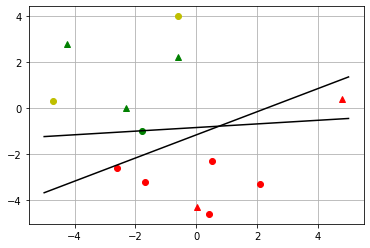

In [32]:
PlotSecond(df2)
area = np.linspace(-5, 5, 10)
line1 = DividingLine(area, weights2[0][0], weights2[1][0], bias2[0])
line2 = DividingLine(area, weights2[0][1], weights2[1][1], bias2[1])
plt.plot(area, line1, color='black')
plt.plot(area, line2, color='black')


for x, y, color in zip(randSeqs[:, 0], randSeqs[:, 1], pred):
    plt.plot(x, y, "^", c=colors[color])

Как видно на графике, моя вторая обучающая выборка сама по себе является линейно неразделимой.